# Fourier Transform Of Images

In [36]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from matplotlib.pyplot import figure

Shape of image : (256, 256)


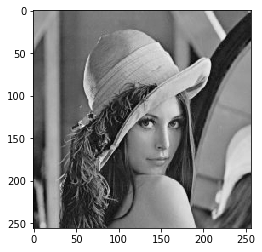

In [165]:
I = cv2.imread('lena.jpg',0)

plt.imshow(I,cmap='gray')
print('Shape of image :',I.shape)

The performance of a DFT is dependent of the image size. It tends to be the fastest for image sizes that are multiple of the numbers two, three and five. <br>As this image's shape is multiple of 2,there is no need to pad with border elements.

In [141]:
I = I.astype('float32') 
planes = [I , np.zeros(I.shape , np.float32)] # Empty plane to store imaginary values of Fourier Transform
input_image = cv2.merge(planes)
print(input_image.shape)

(256, 256, 2)


In [142]:
output_image = cv2.dft(input_image)
print(output_image.shape)

(256, 256, 2)


In [143]:
planes = cv2.split(output_image)
mgn = cv2.magnitude(planes[0] , planes[1]) # magnitude = sqrt(real^2 + imaginary^2)
print(mgn.shape)

(256, 256)


In [144]:
mgn_log = np.log(mgn+1) # Log to scale down the values
maxi = np.max(mgn_log) 
mini = np.min(mgn_log)
print('Maximum value :',maxi,', Minimum value :',mini)

Maximum value : 15.903983 , Minimum value : 1.2567089


In [145]:
mgn_log = mgn_log * (255/maxi) # To scale all the values between 0 & 255
maxi = np.max(mgn_log)
mini = np.min(mgn_log)
print('Maximum value :',maxi,', Minimum value :',mini)

Maximum value : 255.00002 , Minimum value : 20.149717


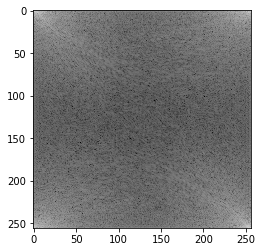

In [146]:
plt.imshow(mgn_log , cmap = 'gray')

Reorganizing this image will help in better visualization

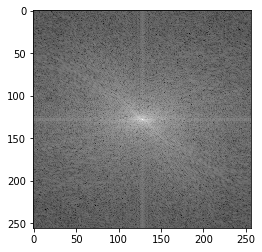

In [147]:
hh = int(mgn_log.shape[0]/2) # Half Height
hw = int(mgn_log.shape[1]/2) # Half Width

mag_spec = mgn_log.copy()

# Interchange the quadrants such that 0,0 becomes the center

mag_spec[:hh,:hw] = mgn_log[hh:,hw:]
mag_spec[hh:,hw:] = mgn_log[:hh,:hw]
mag_spec[hh:,:hw] = mgn_log[:hh,hw:]
mag_spec[:hh,hw:] = mgn_log[hh:,:hw]

plt.imshow(mag_spec , cmap = 'gray')

### Using inbuit function of OpenCV

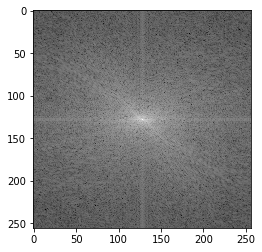

In [156]:
f = cv2.dft(np.float32(I), flags=cv2.DFT_COMPLEX_OUTPUT)
f_shift = np.fft.fftshift(f)
f_complex = f_shift[:,:,0] + 1j*f_shift[:,:,1]
f_abs = np.abs(f_complex) + 1 # lie between 1 and 1e6
f_bounded = 20 * np.log(f_abs)
f_img = 255 * f_bounded / np.max(f_bounded)
f_img0 = f_img.astype(np.uint8)

plt.imshow(f_img0 , cmap = 'gray')